In [1]:
import pandas as pd
import seaborn as sn
import matplotlib.pyplot as plt
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix

<b>Pregunta 1</b> Analiza los dataset data_todotipo.csv y data_reggaeton.csv. ¿Qué puedes decir de los datos,
distribuciones, missing, etc? ¿En qué se diferencian?

<b>Respuesta:</b> De los datasets se puede notar que el dataset todotipo tiene un tamaño de 2230x160 mientras que el dataset reggaeton es de 70x15, lo cual implica que hay una diferencia más que considerable entre la cantidad de datos, esto puede significar un problema en los clasificadores, debido al desbalance en los datos. <br>Otro punto son los datos faltantes (NA values), sólo en el dataset de todotipo existen y son 97 valores inexistentes. Sin embargo, en este caso no serán un problema puesto que como existen muchos casos de canciones de todotipo, los ejemplos con datos faltantes simplemente serán ignorados.<br> En cuanto a la distribución de los datos, se entregan histogramas por feature para cada dataset, es fácil notar que existen ciertas diferencias, una de ellas es la energía, para reggaeton prácticamente todas las canciones se encuentran en el rango superior, mientras que en el otro dataset se encuentran más dispersas.<br>
<b>Nota:</b> Los histogramas tienen distintos valores en el eje de las abscisas, por lo tanto no confundirse con los figuras.

In [2]:
# Se cargan los datasets en dataframes
data_todotipo = pd.read_csv('data_todotipo.csv')
data_reggaeton = pd.read_csv('data_reggaeton.csv')
data_todotipo.shape, data_reggaeton.shape #Tamaño de cada dataset

((2230, 16), (70, 15))

In [3]:
# Datos faltantes en el dataset todotipo y en el de reggaeton
data_todotipo.isna().sum().sum(), data_reggaeton.isna().sum().sum()

(105, 0)

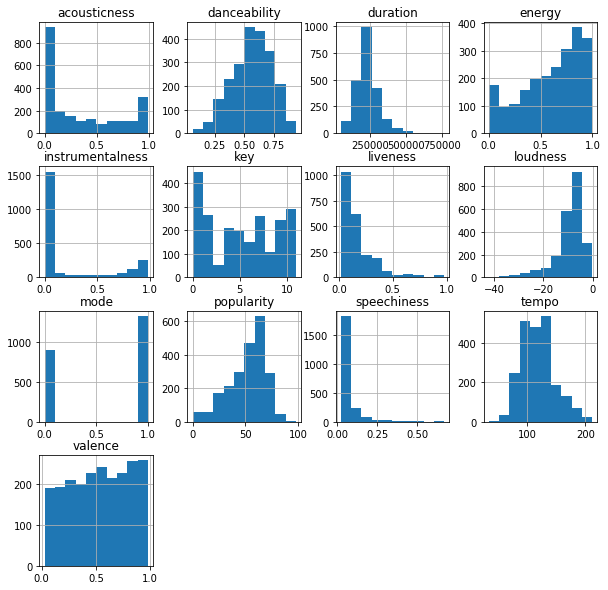

In [4]:
# Histogramas para cada columna del dataset todotipo
fig = plt.figure(figsize = (10,10))
ax = fig.gca()
data_todotipo.iloc[:,1:-2].hist(ax = ax)
plt.show()

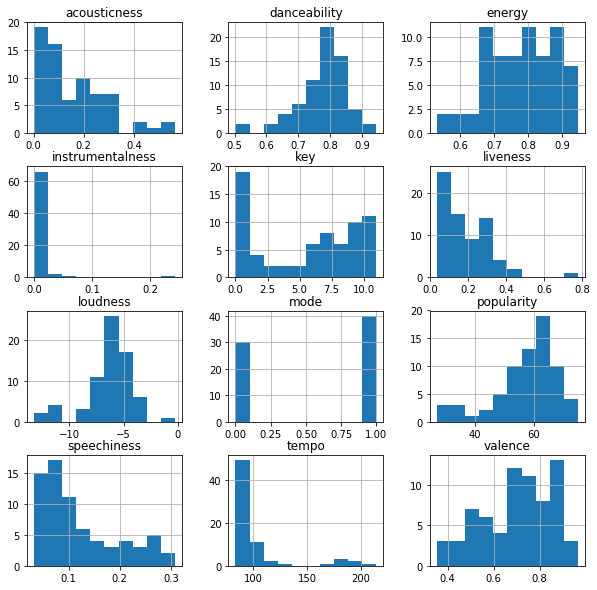

In [5]:
# Histogramas para cada columna del dataset reggaeton
fig = plt.figure(figsize = (10,10))
ax = fig.gca()
data_reggaeton.iloc[:,1:-2].hist(ax = ax)
plt.show()

<b>Pregunta 2</b> Consolida los dos datasets en uno solo y genera una marca para las canciones que sean
reggaeton en base a los datasets.

In [6]:
# Se agrega la marca al dataset de reggaeton(1) y de no reggaeton(0).
data_reggaeton = data_reggaeton.assign(marca_reggaeton = 1)
data_todotipo = data_todotipo.assign(marca_reggaeton = 0)

In [7]:
# Se unen los datasets y se realiza pre-procesamiento en vista de las futuras clasificaciones.
data_todotipo = data_todotipo.drop('time_signature', 1) # Se elimina la columna que sólo exite en un dataset.
dfs = [data_reggaeton, data_todotipo.iloc[:70]] # Se seleccionan 70 filas de cada dataset, para mantener balanceado los datos.
data_todo = pd.concat(dfs, ignore_index=True) # Se unen en un solo dataset.
data_todo

,Unnamed: 0,popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration,id_new,marca_reggaeton
0,1,68.0,0.826,0.70400,9.0,-7.527,1.0,0.1170,0.18900,0.000048,0.0617,0.7410,94.013,205000.0,1,1
1,2,61.0,0.641,0.69300,8.0,-7.327,1.0,0.1630,0.01690,0.000000,0.2190,0.8990,214.058,184413.0,2,1
2,3,67.0,0.771,0.81500,1.0,-5.423,0.0,0.0719,0.16100,0.000020,0.1890,0.5240,94.016,205520.0,3,1
3,4,63.0,0.743,0.78700,1.0,-5.402,1.0,0.2620,0.03520,0.000000,0.0732,0.7190,192.117,172680.0,4,1
4,5,63.0,0.876,0.69200,10.0,-6.429,1.0,0.1040,0.12800,0.000000,0.2490,0.7570,95.032,227280.0,5,1
5,6,67.0,0.675,0.92100,4.0,-6.083,1.0,0.0365,0.04660,0.006180,0.1170,0.7000,97.010,252493.0,6,1
6,7,72.0,0.816,0.74700,8.0,-6.468,0.0,0.0411,0.10200,0.000000,0.2630,0.8480,97.019,210933.0,7,1
7,8,59.0,0.705,0.53300,11.0,-11.974,0.0,0.2720,0.09560,0.000000,0.2920,0.5370,94.022,210103.0,8,1
8,9,50.0,0.847,0.72400,1.0,-7.267,1.0,0.0520,0.01520,0.012500,0.1130,0.6910,102.106,244773.0,9,1
9,10,66.0,0.783,0.82400,0.0,-4.973,1.0,0.1230,0.21400,0.000000,0.1020,0.7260,93.998,187080.0,10,1


<b>Pregunta 3</b>. Entrena uno o varios modelos (usando el/los algoritmo(s) que prefieras) para detectar qué
canciones son reggaeton.

<b>Respuesta:</b> Primeramente se realiza una selección de features y la separación de los datos entre datos de entrenamiento y datos de testeo. Además, se escalaron los datos para mejorar los resultados de los clasificadores. A continuación se entrenan 3 clasificadores, estos son, MLP, SVM y DTree. 

In [8]:
# Selección de features, se determinaron según lo relevante que me parecieron en la clasificación de reggaeton o no reggaeton.
samples = data_todo[['danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness', 'acousticness', 'instrumentalness', 'valence', 'tempo', 'duration']]
targets = data_todo['marca_reggaeton'] 

In [9]:
# Separación del dataset entre datos de entrenamiento y testeo
samples_train, samples_test, targets_train, targets_test = train_test_split(samples, targets, test_size=0.2, random_state=0)

In [10]:
# Escalado de los datos para obtener mejor rendimiento en los clasificadores.
scaler = StandardScaler(copy=True, with_mean=True, with_std=True)
scaler.fit(samples_train)
samples_train = scaler.transform(samples_train)
samples_test = scaler.transform(samples_test)

In [11]:
### MLP ###
# Red Neuronal con 3 hidden layers de 20 neuronas cada una, los parámetros se establecieron según resultados.
clf_mlp = MLPClassifier(solver='lbfgs', hidden_layer_sizes=(20, 20, 20), random_state=0)
clf_mlp.fit(samples_train, targets_train)

MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(20, 20, 20), learning_rate='constant',
       learning_rate_init=0.001, max_iter=200, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=0, shuffle=True,
       solver='lbfgs', tol=0.0001, validation_fraction=0.1, verbose=False,
       warm_start=False)

In [12]:
### SVM ###
# Support Vector Machine con kernel rbf (radial basis function), de todos los kernels fue el con mejor resultados
clf_svm = svm.SVC(kernel='rbf', probability=True)
clf_svm.fit(samples_train, targets_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=True, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [13]:
### DTree ###
# Árbol de decisión
clf_dtree = DecisionTreeClassifier()
clf_dtree.fit(samples_train, targets_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

<b>Pregunta 4</b> Evalúa tu modelo. ¿Qué performance tiene? ¿Qué métricas usas para evaluar esa
performance? ¿Por qué elegiste ese algoritmo en particular? ¿Cómo podrías mejorar la
performance?

<b>Respuesta: </b> A continuación se entregan los resultados de los 3 modelos entrenados. Se mide la performance de cada una de los clasificadores mediante una división entre las canciones correctamente clasificadas y la cantidad de canciones clasificadas, utilizando los datos de testeo. Adicionalmente, se muestran los resultados en una matriz de confusión para mayor claridad. <br>
<br>
   En cuanto a los clasificadores, se eligieron por ser los más comunes y con los que estoy más familiarizado, mientras que los parámetros en cada uno de ellos se establecieron de acuerdo a la calidad de los resultados, luego de realizar variadas pruebas. <br>
   <br>
   Para mejorar los resultados ya se realizaron varios cambios, como el escalado de los datos y también se creo un balance en el dataset, colocando la misma cantidad de cacnciones de reggaeton como de no reggaeton, ya que, los clasificadores tienen problemas de desempeño al existir muchos datos de un tipo y pocos del otro. Otra posible mejora, tiene relación con la cantidad de datos, en vista de dejar la información balanceada sólo se usaron 140 ejemplos (70 c/u), lo cual es un tamaño bastante pequeño. Esta es la principal razón de que algunos clasificadores entreguen incluso una clasificación perfecta. Finalmente, otra opción para mejorar resultados es utilizar varios clasificadores y escoger como resultado final áquel que se repita más veces entre todos.

In [14]:
### MLP ###
# Resultado obtenido luego de comparar los resultados de la Red Neuronal con los resultados esperados.
clf_mlp.score(samples_test, targets_test)

1.0

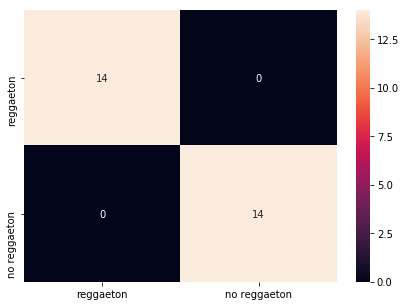

In [15]:
# Matriz de confusión
cm = confusion_matrix(targets_test, clf_mlp.predict(samples_test), labels=[1, 0])
classes = ["reggaeton", "no reggaeton"]
df_cm = pd.DataFrame(cm, index = [i for i in classes], columns = [i for i in classes])
plt.figure(figsize = (7,5))
sn.heatmap(df_cm, annot=True)

In [16]:
### SVM ###
# Resultado obtenido luego de comparar los resultados de SVM con los resultados esperados.
clf_svm.score(samples_test, targets_test)

0.9642857142857143

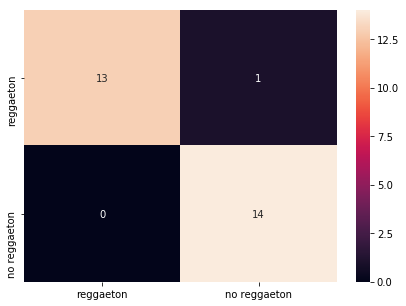

In [17]:
# Matriz de confusión
cm = confusion_matrix(targets_test, clf_svm.predict(samples_test), labels=[1, 0])
df_cm = pd.DataFrame(cm, index = [i for i in classes], columns = [i for i in classes])
plt.figure(figsize = (7,5))
sn.heatmap(df_cm, annot=True)

In [18]:
### DTree ###
# Resultado obtenido luego de comparar los resultados del DTree con los resultados esperados.
clf_dtree.score(samples_test, targets_test)

0.9642857142857143

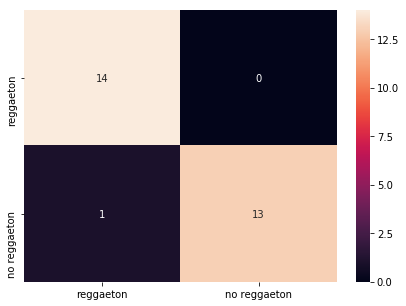

In [19]:
# Matriz de confusión
cm = confusion_matrix(targets_test, clf_dtree.predict(samples_test), labels=[1, 0])
df_cm = pd.DataFrame(cm, index = [i for i in classes], columns = [i for i in classes])
plt.figure(figsize = (7,5))
sn.heatmap(df_cm, annot=True)

<b>Pregunta 5</b> Aplica tu modelo sobre el dataset “data_test.csv”, agregándole a cada registro dos nuevos
campos: marca_reggaeton (un 1 cuando es reggaetón, un 0 cuando no lo es) y
probabilidad_reggaeton (probabilidad de que la canción sea reggaeton). ¿Cómo elegiste
cuáles marcar? ¿De qué depende que predigas la existencia de mayor o menor cantidad de
reggaetones?

<b>Respuesta:</b> A continuación se utiliza el modelo MLP para clasificar las canciones del dataset entre reggaeton y no reggaeton como también se obtienen las probabilidades de que sean reggaeton, toda esta información se agrega al mismo dataset. La elección de si una canción es de reggaeton o no, se determina por probabilidad, eligiendo la clase que obtenga al menos un 0.5(50%).<br> En cuanto a los factores que afectan la performance de los clasificadores, son los que ya se han mencionado anteriormente, la cantidad de los datos que muy pocos a causa de lo desbalanceado que estaban los datasets.  

In [20]:
# Carga de datos a ser clasificados, selección de features y escalado.
data_test = pd.read_csv('data_test.csv')
test = data_test[['danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness', 'acousticness', 'instrumentalness', 'valence', 'tempo', 'duration']]
test = scaler.transform(test)

In [21]:
# Clasificación de las canciones entre reggaeton (1) o no reggaeton (0).
mlp_prediction = clf_mlp.predict(test)
mlp_prediction

array([0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1,
       0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0,
       1, 0, 0, 1, 0, 0])

In [22]:
# Probabilidad de pertenecer a cada clase, la columna 0 entrega probabilidad a no ser reggaeton y 
# la columna 1 entrega probabilidad de ser reggaeton
mlp_prediction_proba = clf_mlp.predict_proba(test)
mlp_prediction_proba

array([[1.00000000e+00, 9.62858228e-12],
       [2.35099372e-03, 9.97649006e-01],
       [3.99261202e-09, 9.99999996e-01],
       [1.00000000e+00, 1.27985126e-10],
       [9.99999999e-01, 1.25508739e-09],
       [9.99999998e-01, 1.95419591e-09],
       [3.34616335e-10, 1.00000000e+00],
       [2.40567861e-07, 9.99999759e-01],
       [1.00000000e+00, 1.58259483e-11],
       [1.00000000e+00, 7.86983787e-16],
       [9.99997704e-01, 2.29645791e-06],
       [9.99999970e-01, 3.01198585e-08],
       [3.88764304e-04, 9.99611236e-01],
       [1.48421939e-07, 9.99999852e-01],
       [2.28719824e-02, 9.77128018e-01],
       [9.99988177e-01, 1.18231272e-05],
       [3.39375861e-10, 1.00000000e+00],
       [9.91648188e-01, 8.35181243e-03],
       [2.79090411e-03, 9.97209096e-01],
       [2.65936708e-07, 9.99999734e-01],
       [9.83990994e-08, 9.99999902e-01],
       [5.50323184e-05, 9.99944968e-01],
       [1.00000000e+00, 2.85316622e-15],
       [1.39320616e-07, 9.99999861e-01],
       [1.000000

In [23]:
# Agregar las columnas 'marca_reggaeton' y 'probabilidad_reggaeton' al dataset.
data_test = data_test.assign(marca_reggaeton=mlp_prediction, probabilidad_reaggeton=mlp_prediction_proba[:,1]) 

In [24]:
# Estado final del dataset incluyendo la información inicial y las columnas agregadas.
data_test

,Unnamed: 0,popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration,time_signature,id_new,marca_reggaeton,probabilidad_reaggeton
0,1,60,0.607,0.8750,0,-4.434,1,0.0605,0.001140,0.007650,0.4670,0.4570,131.058,264520,4,2301,0,9.628582e-12
1,2,69,0.757,0.8680,9,-9.326,1,0.0620,0.411000,0.002210,0.3550,0.8150,138.923,199200,4,2302,1,9.976490e-01
2,3,88,0.791,0.8660,6,-4.236,1,0.0497,0.248000,0.000005,0.0696,0.7100,96.011,217080,4,2303,1,1.000000e+00
3,4,70,0.589,0.4840,7,-6.622,1,0.0266,0.489000,0.000000,0.1130,0.0927,120.258,269973,4,2304,0,1.279851e-10
4,5,61,0.617,0.7710,10,-5.586,0,0.1120,0.038400,0.000003,0.1620,0.5530,180.002,267747,4,2305,0,1.255087e-09
5,6,75,0.502,0.9720,10,-3.960,0,0.0793,0.000068,0.000702,0.0627,0.7290,138.019,197280,4,2306,0,1.954196e-09
6,7,60,0.828,0.6420,1,-7.399,1,0.0821,0.306000,0.000714,0.1030,0.5450,97.986,217966,4,2307,1,1.000000e+00
7,8,71,0.770,0.7900,10,-5.453,0,0.0814,0.139000,0.000000,0.0829,0.8720,93.970,195453,4,2308,1,9.999998e-01
8,9,73,0.547,0.6910,4,-13.553,0,0.0369,0.015000,0.105000,0.1440,0.6670,137.148,261933,4,2309,0,1.582595e-11
9,10,76,0.613,0.8730,7,-6.376,0,0.0449,0.003970,0.001110,0.3670,0.3920,129.989,234813,4,2310,0,7.869838e-16
